## Exploring the Freelance AI Job Market: A Data Story
As an AI student navigating the vast freelancing job market, I embarked on a journey to uncover trends, demands, and insights from real job postings. Instead of just showing graphs, this notebook tells a story—around skills, locations, salaries, and evolving roles from freelancer point of view and company's—aiming to guide learning and career decisions with data-backed evidence.

### Approach at a Glance
This exploration uses scraped job posting data from freelancing platforms to decode market demands. The journey includes data cleaning, skill extraction, title normalization, and analysis by job type, location, experience, and pay trends.

Through visual and narrative insights, I will highlight what skills shine, where opportunities lie, and how roles are evolving in the AI job landscape.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
jobs = pd.read_csv("AI_freelance_jobs.csv",index_col = False)
jobs.head()

,title,location,budget,job_type,experience,rating,skills,page
0,Staff/Senior Software Engineer – Applied AI (H...,United States,$70.00,Hourly,Expert,5.0,"Artificial Intelligence, Python, API, Machine ...",1
1,Expert AI/ML Engineer Needed for LLM Project D...,United States,$30.00,Hourly,Expert,5.0,"Python, Machine Learning, Artificial Intellige...",1
2,"Senior Backend Engineer – Queue/Scheduler, Tel...",United States,$20.00,Hourly,Expert,5.0,"MongoDB, Python, Node.js, Celery, API, Twilio ...",1
3,AI Engineer Needed for Cloud Infrastructure Pl...,Pakistan,NaN,Hourly,Intermediate,NaN,"Artificial Intelligence, Python, Google Cloud ...",1
4,Senior AI Engineer & Automation Specialist,United States,$30.00,Fixed-price,Intermediate,5.0,"Machine Learning, Artificial Intelligence, Dat...",1


In [8]:
freelancers = pd.read_csv("AI_Freelancers.csv",index_col = False)
freelancers.head()

,ID,location,budget,total_earnings,total_jobs,total_hours,skills,associated with company,company name,description,page
0,~0152599b36414e1111,India,$25.00/hr,$200K+,92,"14,221","AI Bot, AI Chatbot, AI Development, AI Text-to...",yes,Excellence Technologies Pvt. Ltd. - Leading So...,𝗧𝗼𝗽 𝗥𝗮𝘁𝗲𝗱 𝗔𝗜 𝗘𝗻𝗴𝗶𝗻𝗲𝗲𝗿 & 𝗙𝘂𝗹𝗹-𝗦𝘁𝗮𝗰𝗸 𝗗𝗲𝘃𝗲𝗹𝗼𝗽𝗲𝗿 |...,1
1,~018df91fc406df4fa8,India,$25.00/hr,$3K+,5,60,"AI Agent Development, OpenAI API, LLM Prompt, ...",yes,VKAPS IT Solutions Pvt. Ltd.,I engineer production-grade AI systems that th...,1
2,~01fee9ab65b45dfa94,Pakistan,$10.00/hr,$8K+,15,709,"AI Content Creation, AI Text-to-Image, AI-Gene...",no,NaN,🌟 Hello! I'm Your Ultimate AI Expert for Creat...,1
3,~0178ed5ff15b50300f,Morocco,$45.00/hr,$4K+,36,21,"AI Image Editing, AI Text-to-Image, AI Text-to...",no,NaN,✨ TRANSFORM YOUR IDEAS INTO STUNNING VISUAL RE...,1
4,~01af4cc133cdcb99b3,Ukraine,$45.00/hr,$30K+,10,269,"AI Agent Development, ChatGPT, ChatGPT API, AI...",yes,AVOX,Hi 👋\n\nI am an experienced developer with a p...,1


## Data Exploration

Before diving into skills, salaries, and career patterns, it’s important to pause and get familiar with the dataset itself.  
Every story begins with understanding the raw material, and here the raw material is job postings scraped from freelancing platforms.  

By exploring the structure of the data — the number of rows and columns, which fields are complete or missing, and the distribution of key features — I’m essentially mapping the landscape before analyzing it.  

This step answers questions like:  
- How big is the dataset I’m working with?  
- Which columns are rich and reliable, and which have gaps?  
- How are different features (like `title`, `skills`, `salary`, `experience_level`, and `payment_type`) represented?  



#### Dataset Size 
The first step in exploring the AI freelance job market is to understand how much information we actually have.  
By checking the number of rows and columns, I’m essentially asking: *“How many job postings are captured, and how many features describe them?”*  

This tells me whether I’m working with a broad, diverse dataset or something smaller and more niche.

In [3]:
jobs.shape

(300, 8)

In [9]:
freelancers.shape

(499, 11)

*The dataset contains **300 rows x 8 columns job postings** , **499 rows x 11 column of freelancers profiles**, which means I have 300 job postings described by 8 features , 499 Freelancer profile descriped by 11 features. This gives me enough breadth to spot real market patterns.*  

#### Column Overview & Missing Data  

Next, I look at the dataset’s schema — what type of data each column holds, and how complete it is.  
Do most jobs list salaries? Do they all have titles, skills, and locations? Or are there gaps that I need to handle carefully?  

This check helps me avoid blind spots later: if a column has lots of missing values, I can’t treat it as a reliable signal.  


In [11]:
jobs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       296 non-null    object 
 1   location    299 non-null    object 
 2   budget      282 non-null    object 
 3   job_type    264 non-null    object 
 4   experience  299 non-null    object 
 5   rating      194 non-null    float64
 6   skills      298 non-null    object 
 7   page        300 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 18.9+ KB


*Some columns, like `title` and `payment_type`, are well-populated. Others, like `rating` or `job_type`, may have gaps.  
Knowing this upfront lets me decide where to trust the data fully and where to handle missing values thoughtfully.*  


In [12]:
freelancers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       499 non-null    object
 1   location                 491 non-null    object
 2   budget                   497 non-null    object
 3   total_earnings           499 non-null    object
 4   total_jobs               488 non-null    object
 5   total_hours              376 non-null    object
 6   skills                   492 non-null    object
 7   associated with company  499 non-null    object
 8   company name             231 non-null    object
 9   description              498 non-null    object
 10  page                     499 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 43.0+ KB


*Here also some columns, like `total_earnings` and `budget`, are well-populated. Others, like `company_name` or `total_hours`.*  

#### Null Value Counts  

To be more precise, I count the exact number of missing vs non-missing values in each feature.  
This gives me a clearer picture of how strong each signal is in the dataset.  


In [5]:
jobs.isna().sum()

title           4
location        1
budget         18
job_type       36
experience      1
rating        106
skills          2
page            0
dtype: int64

*Columns with high null counts (for example, `job_type` or `rating`) highlight areas where not all clients share complete info.  
This reflects real-world freelancing platforms: not every posting gives full details, and freelancers must often make decisions with partial informatiom.*  


In [14]:
freelancers.isna().sum()

ID                           0
location                     8
budget                       2
total_earnings               0
total_jobs                  11
total_hours                123
skills                       7
associated with company      0
company name               268
description                  1
page                         0
dtype: int64

*Here columns with null values shows what should freelancer focus on and what doen't matter. (for example,`skills`) is almost a must because companies are looking for someone who has specific skills to get some job done.*

## Data Preparation  

If data exploration was about *getting to know the landscape*, then data preparation is about *making the road walkable*.  
This is the stage where raw, messy job postings are transformed into a structured dataset that can actually tell a story.  

For me, this is the most important part of the entire workflow:  
- Removing unnecessary columns and rows keeps the focus on signals that matter.  
- Renaming columns makes the dataset human-readable and analysis-ready.  
- Cleaning column structures (for example, converting `salary` into integers) ensures that numbers behave like numbers, not strings.  

**Why this matters :** A messy dataset hides patterns, but a clean one reveals them.  
If this section is done well, everything that follows — salary analysis, skill demand, experience trends — becomes clearer, more reliable, and more actionable.  


#### Dropping Irrelevant Columns  
Some columns don’t add any value to the analysis — for example, `page`, which only reflects the scraping process, not the job market itself.  
By removing them, I keep the dataset lean and focused on features that actually describe jobs.  


In [6]:
jobs = jobs.drop( 'page' , axis = 1)

#### Renaming Columns for Clarity  
Column names should be human-readable and self-explanatory.  
I rename:  
- `budget` → `salary`  
- `experience` → `experience_level`  
- `job_type` → `payment_type`  

This makes later plots and insights easier to follow.  

In [7]:
jobs = jobs.rename(columns={'budget' : 'salary' , 'experience' : 'experience_level' , 'job_type' : 'payment_type'})

#### Cleaning Job Titles  
Many titles contain long strings of unnecessary detail.  
To simplify, I extract the portion before the word *Engineer* — so instead of messy text, we keep consistent, comparable job titles.  


In [8]:
#jobs['title'] = jobs['title'].str.extract(r'(.*?Engineer)')

#### Cleaning and Converting Salaries  
The `salary` column originally contained symbols (`$`) and text, making it unusable for numeric analysis.  

Steps taken:  
1. Remove currency symbols and text.  
2. Extract the numeric portion.  
3. Convert it from object type to integer (`Int64`).  

Now salaries behave like numbers, which allows us to calculate averages, distributions, and comparisons.  


In [9]:
jobs['salary'] = jobs['salary'].str.split(r'(\d+)' , expand = False).str[1]
jobs['salary'] = jobs['salary'].astype('Int64')


In [10]:
jobs.head()

,title,location,salary,payment_type,experience_level,rating,skills
0,Staff/Senior Software Engineer – Applied AI (H...,United States,70,Hourly,Expert,5.0,"Artificial Intelligence, Python, API, Machine ..."
1,Expert AI/ML Engineer Needed for LLM Project D...,United States,30,Hourly,Expert,5.0,"Python, Machine Learning, Artificial Intellige..."
2,"Senior Backend Engineer – Queue/Scheduler, Tel...",United States,20,Hourly,Expert,5.0,"MongoDB, Python, Node.js, Celery, API, Twilio ..."
3,AI Engineer Needed for Cloud Infrastructure Pl...,Pakistan,<NA>,Hourly,Intermediate,NaN,"Artificial Intelligence, Python, Google Cloud ..."
4,Senior AI Engineer & Automation Specialist,United States,30,Fixed-price,Intermediate,5.0,"Machine Learning, Artificial Intelligence, Dat..."


## Data Plotting  

This section is where the story of the AI freelance market really comes alive.  
Just like any newcomer stepping into freelancing (including myself), I had a set of burning questions:  

-  **Where are the opportunities?** Which countries (and remote jobs) dominate the market?  
-  **How much can I expect to earn?** Which countries offer the highest salaries, and how does pay differ between hourly and fixed-price work?  
-  **What do clients want?** Which skills are most in demand, and are companies looking for seasoned experts only — or is there room for beginners too?  
-  **Do ratings matter?** Do higher-rated companies lean toward fixed or hourly contracts?  

To answer these, I included more than ten visualizations — not to overwhelm, but because I didn’t want to miss anything important in the data.  
Every chart is a different piece of the puzzle, and together they form a complete picture of how the freelance AI job market works.  

 **Why this matters:** As someone mapping my own next steps in freelancing, each of these plots is like a signpost. They help me (and hopefully others too) see where the opportunities are, what skills to sharpen, and what career paths look like in practice.  


## Geographic Opportunities  

Freelancing may be borderless, but geography still shapes opportunity.  
I explored three angles:  
1. **Which countries post the most jobs** → to understand where demand comes from.  
2. **Which countries pay the most** → to see where the financial upside lies.  
3. **How company ratings vary by country** → to gauge freelancer satisfaction with clients across regions.  

Together, these reveal a key tension: the markets with the most jobs (like the US and India) are not always the ones with the highest pay or the best ratings.  
For a new freelancer, this means balancing between *volume of opportunities* and *quality of opportunities*.  


### Where are the jobs?
The first question for any freelancer is simple: *where are the jobs?*   
Are most opportunities in the US and Europe, or is freelancing truly global with remote options everywhere?   

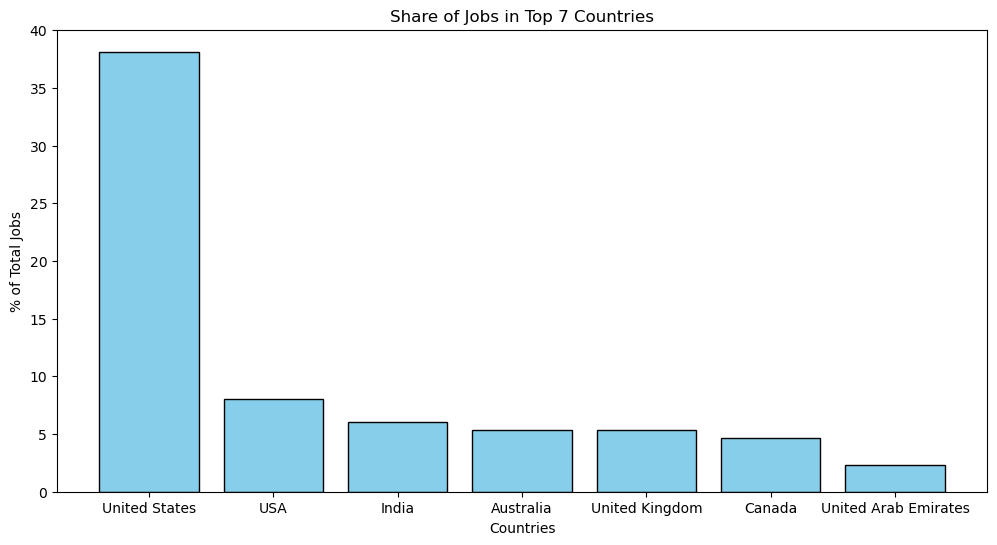

In [11]:
top_countries = jobs['location'].value_counts(normalize=True).head(7) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_countries.index, top_countries.values, color="skyblue", edgecolor="black")
ax.set(title="Share of Jobs in Top 7 Countries", xlabel="Countries", ylabel="% of Total Jobs")
plt.show()


The majority of opportunities cluster in the United States, the UK, and India, which together account for a large share of postings.  
However, remote roles remain significant, proving that freelancing is not tied to geography — a crucial point for newcomers outside the top markets.  

### Which Countries Offer the Highest Salaries?
Having seen where the jobs are, the next question is: *where does freelancing pay the most?*  
Do clients in the US and UK offer higher salaries, or do other countries outcompete them?  
And how does this vary between **hourly** and **fixed-price** contracts?  

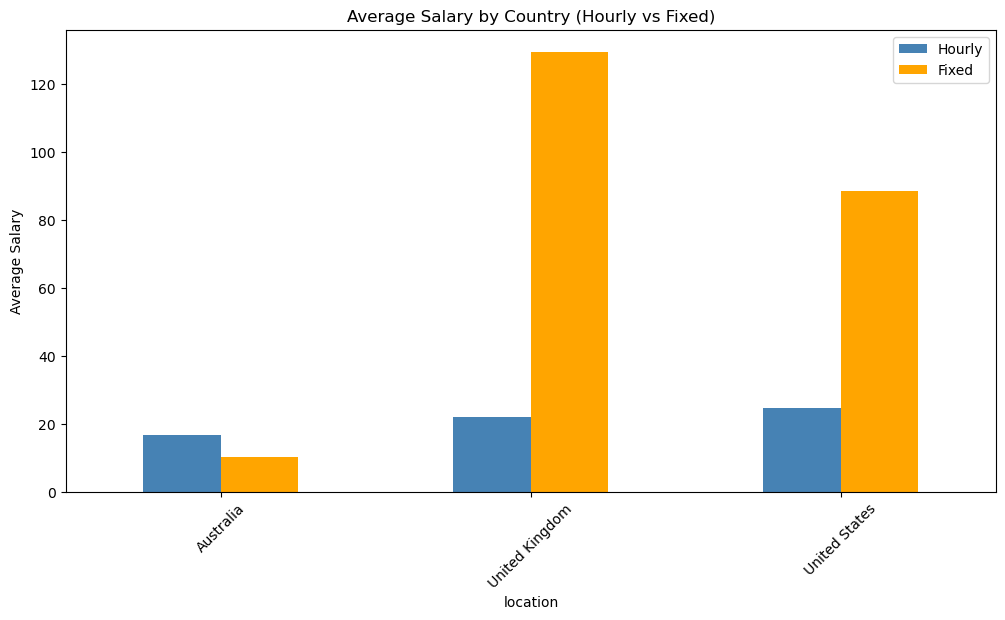

In [12]:
hourly_locations = jobs[jobs['payment_type'] == 'Hourly'].dropna(subset=['location'])
hourly_counts = hourly_locations['location'].value_counts()

hourly_locations = hourly_locations[hourly_locations['location'].isin(hourly_counts[hourly_counts > 3].index)]

fixed_locations = jobs[jobs['payment_type'] == 'Fixed-price'].dropna(subset=['location'])
fixed_counts = fixed_locations['location'].value_counts()

fixed_locations = fixed_locations[fixed_locations['location'].isin(fixed_counts[fixed_counts > 3].index)]

hourly_locations_mean = (hourly_locations.groupby('location')['salary']
                         .mean().sort_values(ascending=False).head(10))

fixed_locations_mean = (fixed_locations.groupby('location')['salary']
                        .mean().sort_values(ascending=False).head(10))
salary_compare = pd.DataFrame({
    "Hourly": hourly_locations_mean,
    "Fixed": fixed_locations_mean
}).dropna()

salary_compare.plot(kind="bar", figsize=(12,6), color=["steelblue", "orange"])
plt.title("Average Salary by Country (Hourly vs Fixed)")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()



Salaries vary widely between countries. Some markets (like the US) offer consistently higher pay across both hourly and fixed contracts, while others show sharp differences — paying well in fixed contracts but not in hourly ones.  
This suggests that local hiring culture influences contract type: some regions prefer long-term hourly freelancers, others prefer high-value one-off projects.  


### How Do Company Ratings Differ by Country?
Salary isn’t everything. For freelancers, *client quality* also matters.  
To explore this, I compared **average company ratings** across countries.  
High ratings suggest positive freelancer experiences, while low ratings may signal issues with scope, payment, or communication.  


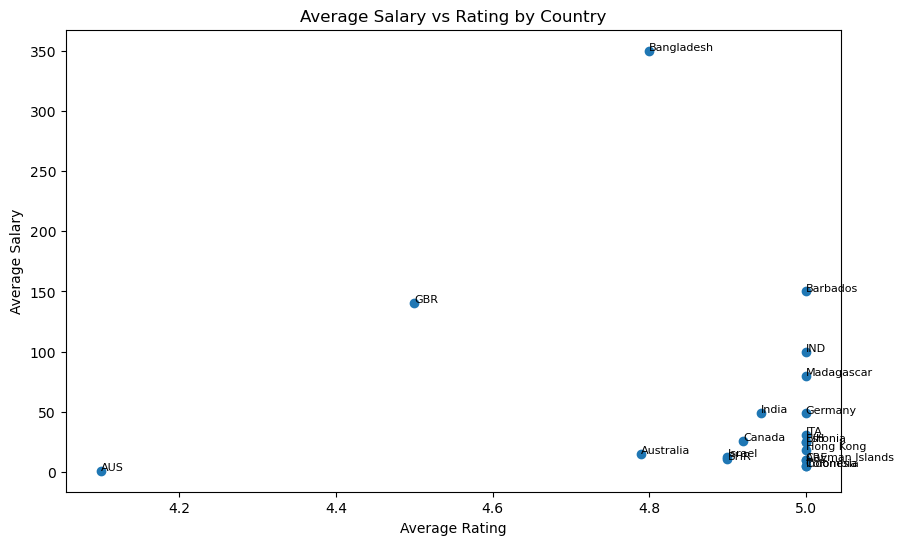

In [13]:
country_salary_rating = jobs.groupby('location').agg({
    'salary': 'mean',
    'rating': 'mean'
}).dropna().head(20)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(country_salary_rating['rating'], country_salary_rating['salary'])
for country in country_salary_rating.index:
    ax.text(country_salary_rating.loc[country,'rating'],
            country_salary_rating.loc[country,'salary'],
            country, fontsize=8)
ax.set(title="Average Salary vs Rating by Country", xlabel="Average Rating", ylabel="Average Salary")
plt.show()


Not all high-paying countries have the highest-rated clients. Some regions combine strong pay with good ratings, while others pay well but score lower in reliability and satisfaction.  
For a freelancer, this highlights the tradeoff: *chasing the highest salary might not always mean working with the best clients*.  


## Experience Levels  

A big question for new freelancers is: *“Do clients only want experts, or is there still space for beginners?”*  
To answer this, I looked at how jobs are distributed across **Entry, Intermediate, and Expert** levels.  


### What is the demand across experience levels?

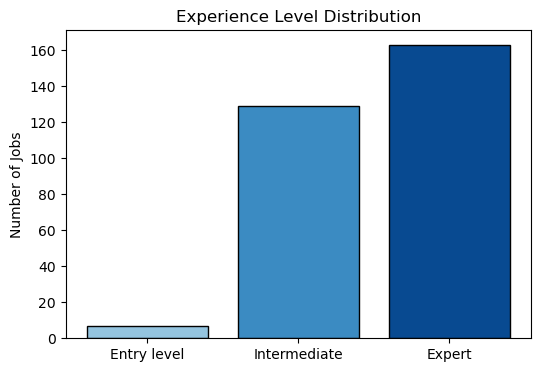

In [14]:
import matplotlib.cm as cm

experience = jobs['experience_level'].value_counts(ascending=True)
colors = cm.Blues(np.linspace(0.4, 0.9, len(experience)))

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(experience.index, experience.values, color=colors, edgecolor="black")
ax.set_title("Experience Level Distribution")
ax.set_ylabel("Number of Jobs")
plt.show()


Most jobs target **Expert** and **Intermediate** levels, with fewer reserved for entry.  
This shows that Freelancing is more tending to some experience while the newcomers tend for life long jobs  


### Do higher experienced freelancers tend toward fixed or hourly jobs?
The next question is: *“Does experience level affect the kind of contracts freelancers get?”*  
To explore this, I compared **payment type** (Hourly vs Fixed-price) across experience levels.  


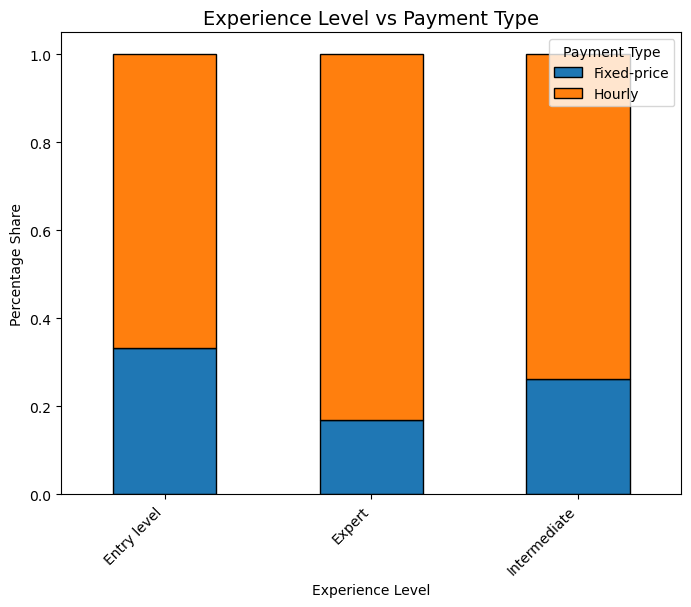

In [15]:
exp_payment = pd.crosstab(jobs['experience_level'], jobs['payment_type'])
exp_payment_pct = exp_payment.div(exp_payment.sum(axis=1), axis=0)

ax = exp_payment_pct.plot(kind='bar', stacked=True, figsize=(8,6), 
                          color=['#1f77b4','#ff7f0e'], edgecolor='black')
plt.title("Experience Level vs Payment Type", fontsize=14)
plt.ylabel("Percentage Share")
plt.xlabel("Experience Level")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Payment Type")
plt.show()


- Entry-level freelancers mostly work on **Fixed-price contracts** — lower risk, lower pay, but steady.  
- Intermediate and Expert freelancers shift toward **Hourly contracts**, which come with higher payouts and more responsibility.  

 *This shows a career path: most freelancers **start fixed**, but as skills and trust grow, they transition to higher-paying Hourly contracts.*  


## Skills in Demand  

Knowing which skills open doors is critical.  
Freelancing isn’t just about titles — it’s about what clients are actually asking for in their job postings.  


### What are the most in-demand skills?

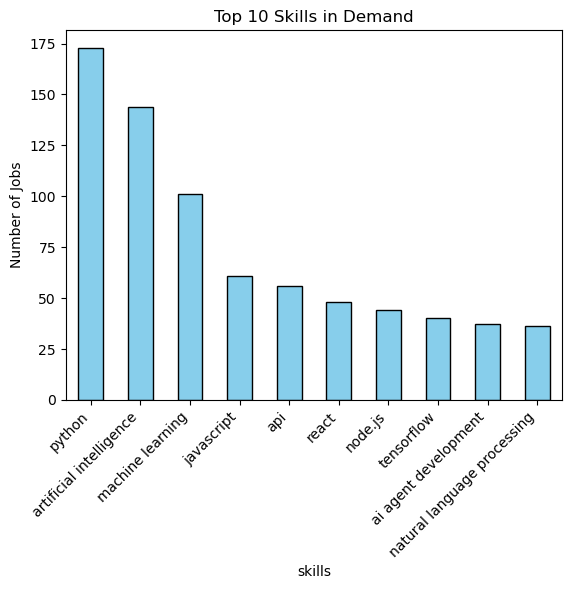

In [16]:
jobs['skills'] = jobs['skills'].apply(
    lambda x: [s.strip() for s in x.split(',')] if isinstance(x, str) else (x if isinstance(x, list) else [])
)

all_skills = jobs['skills'].explode()
all_skills = all_skills.str.strip().str.lower()
skill_counts = all_skills.value_counts()

skill_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Skills in Demand")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()


- **Python** dominates as the single most demanded skill — a must-have for any AI freelancer.  
- **Artificial Intelligence** and **Machine Learning** follow closely, confirming the market’s technical core.  
- Supporting skills like **JavaScript** and **API integration** also appear, showing that freelancers are often expected to **bridge between AI models and deployment environments**.  

 *The story here: strong fundamentals (Python + ML/AI basics) are non-negotiable, while complementary skills expand opportunities.*  


## Salary Patterns

### What is the Average Budget?

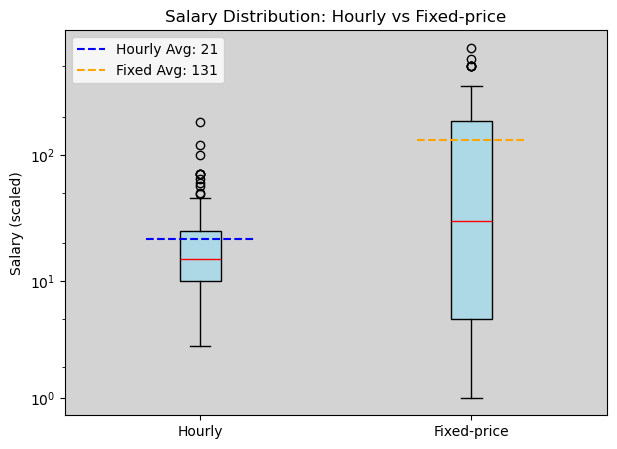

In [17]:
Hourly = jobs.loc[jobs['payment_type'] == 'Hourly', 'salary']
Fixed_price = jobs.loc[jobs['payment_type'] == 'Fixed-price', 'salary']
fig, ax = plt.subplots(figsize=(7, 5))

ax.boxplot([Hourly.dropna(), Fixed_price.dropna()],
           tick_labels=["Hourly", "Fixed-price"],
           patch_artist=True,
           boxprops=dict(facecolor="lightblue"),
           medianprops=dict(color="red"))

ax.set_facecolor('lightgray')
ax.set_yscale("asinh")
ax.set_ylabel("Salary (scaled)")
ax.set_title("Salary Distribution: Hourly vs Fixed-price")

# Show averages as horizontal lines
ax.hlines(np.mean(Hourly), xmin=0.8, xmax=1.2, colors="blue", linestyles="--", label=f"Hourly Avg: {round(np.mean(Hourly))}")
ax.hlines(np.mean(Fixed_price), xmin=1.8, xmax=2.2, colors="orange", linestyles="--", label=f"Fixed Avg: {round(np.mean(Fixed_price))}")
ax.legend()

plt.show()


Hourly contracts cluster tightly around lower salaries, with fewer extreme outliers. Fixed-price jobs, meanwhile, stretch across a much wider range, with higher upside potential. The average also skews higher for fixed contracts — suggesting clients assign bigger budgets to projects that require full ownership.

### How does experience affect salary by contract type?

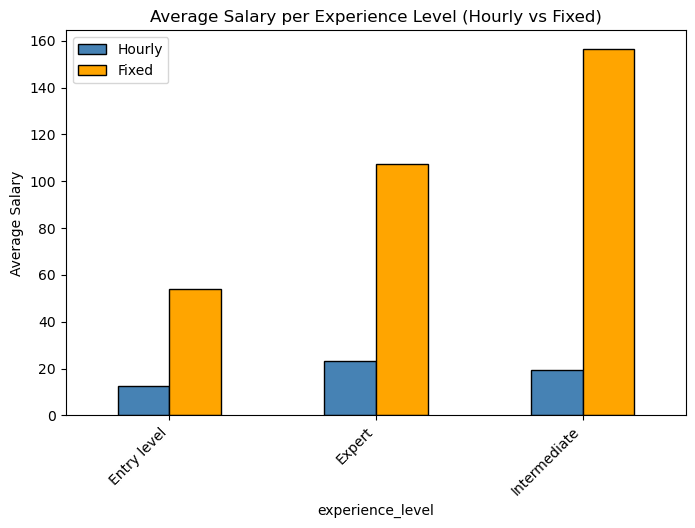

In [18]:
hourly_experience_level = jobs[jobs['payment_type'] == 'Hourly'].dropna(subset=['experience_level'])
fixed_experience_level  = jobs[jobs['payment_type'] == 'Fixed-price'].dropna(subset=['experience_level'])

hourly_experience_level_mean = hourly_experience_level.groupby('experience_level')['salary'].mean().sort_values(ascending= False).dropna().head(10)
fixed_experience_level_mean = fixed_experience_level.groupby('experience_level')['salary'].mean().sort_values(ascending= False).dropna().head(10)

salary_exp_compare = pd.DataFrame({
    "Hourly": hourly_experience_level.groupby('experience_level')['salary'].mean(),
    "Fixed": fixed_experience_level.groupby('experience_level')['salary'].mean()
})

salary_exp_compare.plot(kind="bar", figsize=(8,5), color=["steelblue","orange"], edgecolor="black")
plt.title("Average Salary per Experience Level (Hourly vs Fixed)")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha="right")
plt.show()


Hourly salaries rise steadily with experience — experts clearly earn more per hour.

For fixed-price, intermediates peak higher than experts. This suggests clients see intermediates as a “sweet spot”: skilled enough to deliver major projects, yet more affordable than experts.

## Ratings & Companies

### What percentage of jobs are Hourly vs Fixed?

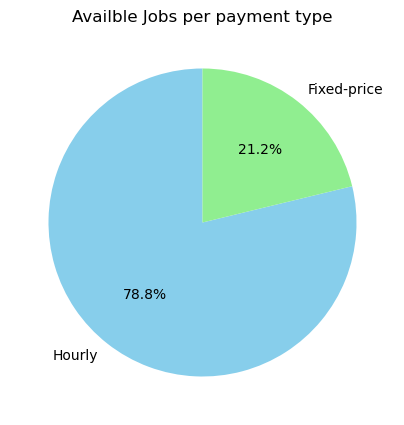

In [19]:
jobs['payment_type'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, figsize=(5,5), colors=["skyblue", "lightgreen"])
plt.title("Availble Jobs per payment type")
plt.ylabel("")
plt.show()

Hourly contracts make up nearly 80% of all jobs. This shows that freelancing is built on hourly work, and for newcomers, it’s the most common starting point.

### Do high-rated companies prefer Hourly or Fixed?

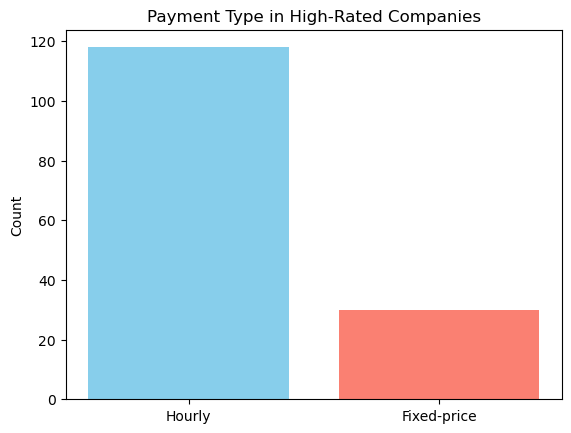

In [20]:
high_rated = jobs[jobs['rating'] >= 4.5]

payment_counts = high_rated['payment_type'].value_counts()

fig, ax = plt.subplots()
ax.bar(payment_counts.index, payment_counts.values, color=['skyblue','salmon'])
ax.set_title("Payment Type in High-Rated Companies")
plt.ylabel("Count")
plt.show()


High-rated companies lean toward hourly contracts, suggesting they value ongoing, collaborative relationships. However, fixed-price contracts still make up a meaningful share, meaning that even trusted companies use them for well-scoped projects.

### Which countries have the best-rated companies?

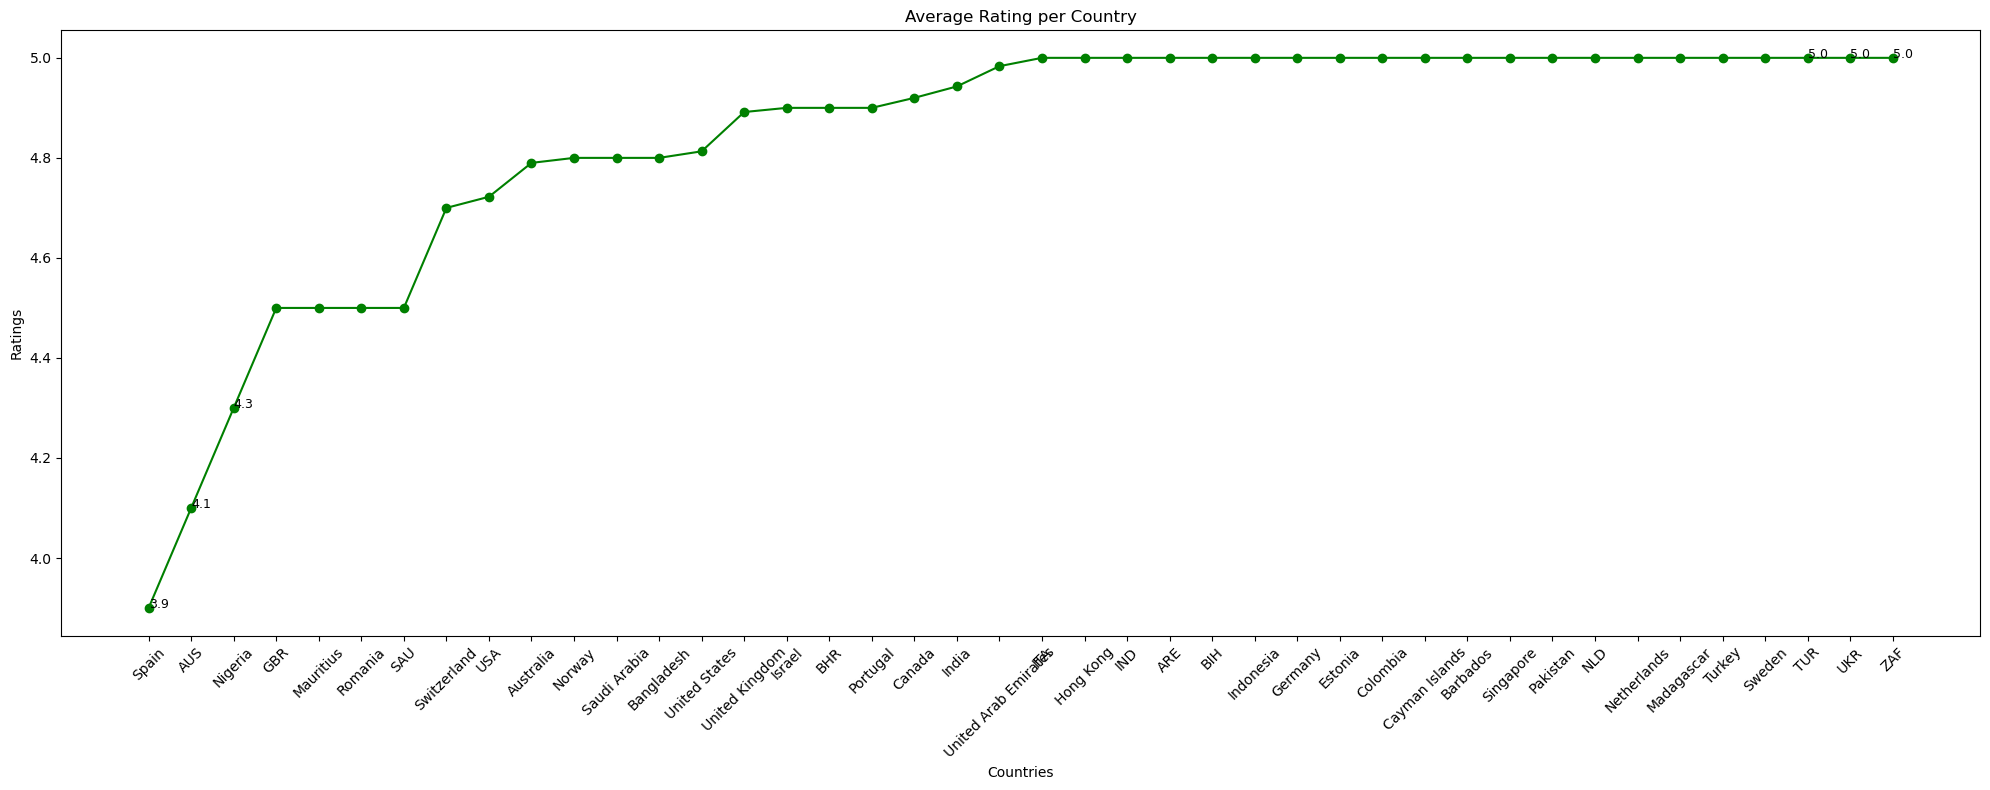

In [21]:
filtered = jobs.dropna(subset=['rating'])

top_ratings_countries = filtered.groupby('location')['rating'].mean().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(top_ratings_countries.index, top_ratings_countries.values, marker="o", color="green")
ax.set(title="Average Rating per Country", xlabel="Countries", ylabel="Ratings")
ax.tick_params(axis='x', rotation=45)

for country in list(top_ratings_countries.head(3).index) + list(top_ratings_countries.tail(3).index):
    ax.text(country, top_ratings_countries[country], f"{round(top_ratings_countries[country],2)}", fontsize=9)

fig.tight_layout()
plt.show()


Not all high-paying regions have the best ratings. Some countries combine strong pay and good freelancer satisfaction, while others pay well but score lower in trust. Freelancers should weigh earning potential vs client quality when choosing markets.

### 🚀 Conclusion: Building an AI Freelance Career  

This analysis shows that the AI freelance market is both promising and competitive:  

- **Skills**: Python, AI, and ML are the essential toolkit. Supporting skills (e.g., JavaScript, APIs) help bridge modeling and deployment.  
- **Geography**: Opportunities cluster in the US, UK, and India, but remote work ensures global access.  
- **Contracts**: Hourly dominates and is the entry point, while fixed-price projects unlock higher earning potential as freelancers gain trust.  
- **Experience**: There’s room for newcomers, but the steepest salary growth happens as you move from entry-level → intermediate.  
- **Clients**: High-rated companies prefer hourly contracts, valuing collaboration, while fixed contracts remain important for defined projects.  

 **Actionable Takeaway:**  
For someone starting an AI freelance career, the best path is:  
1. **Master Python + ML fundamentals.**  
2. **Begin with Fixed entry-level projects** to build reputation and client trust.  
3. **Transition to Hourly jobs** that showcase full ownership of solutions.  
4. **Layer in specialized skills** (like AI frameworks or deployment tools) to unlock higher pay.  


In [22]:
jobs

,title,location,salary,payment_type,experience_level,rating,skills
0,Staff/Senior Software Engineer – Applied AI (H...,United States,70,Hourly,Expert,5.0,"[Artificial Intelligence, Python, API, Machine..."
1,Expert AI/ML Engineer Needed for LLM Project D...,United States,30,Hourly,Expert,5.0,"[Python, Machine Learning, Artificial Intellig..."
2,"Senior Backend Engineer – Queue/Scheduler, Tel...",United States,20,Hourly,Expert,5.0,"[MongoDB, Python, Node.js, Celery, API, Twilio..."
3,AI Engineer Needed for Cloud Infrastructure Pl...,Pakistan,<NA>,Hourly,Intermediate,NaN,"[Artificial Intelligence, Python, Google Cloud..."
4,Senior AI Engineer & Automation Specialist,United States,30,Fixed-price,Intermediate,5.0,"[Machine Learning, Artificial Intelligence, Da..."
...,...,...,...,...,...,...,...
295,DevOps Engineer Needed to Build AI First Pipel...,United States,28,NaN,Expert,5.0,"[AIOps, DevOps Engineering, Deployment Automat..."
296,Data Engineer /Data Analyst – AI and Data Driv...,United States,10,Hourly,Expert,5.0,"[Data Engineering, Data Integration, Data Tran..."
297,Automation Engineer for AI Agent Workflows usi...,Australia,10,Fixed-price,Intermediate,5.0,"[Python, Artificial Intelligence, Robotic Proc..."
298,Senior Software Engineer (Laravel + Weaviate +...,United States,10,Hourly,Intermediate,5.0,"[API, Python, PHP, Laravel, RESTful API, JavaS..."


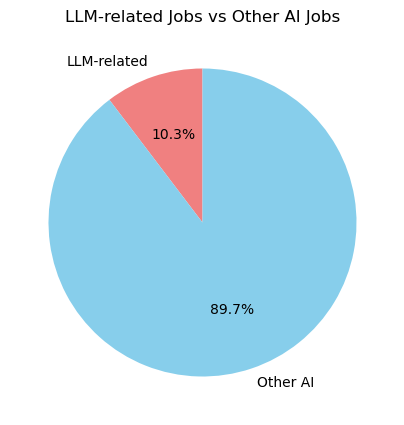

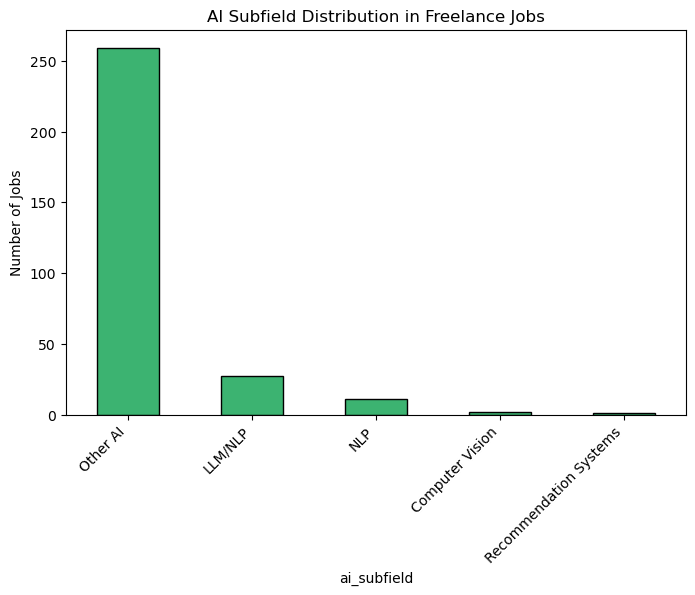

In [26]:
llm_jobs = jobs['title'].str.contains("LLM|GPT|Chatbot|Language Model", case=False, na=False)
llm_vs_other = pd.Series({
    "LLM-related": llm_jobs.sum(),
    "Other AI": (~llm_jobs).sum()
})

llm_vs_other.plot(kind="pie", autopct='%1.1f%%', startangle=90, 
                  colors=["lightcoral","skyblue"], figsize=(5,5))
plt.title("LLM-related Jobs vs Other AI Jobs")
plt.ylabel("")
plt.show()


def categorize_ai(title):
    title = str(title).lower()
    if "vision" in title: return "Computer Vision"
    elif "nlp" in title or "language" in title: return "NLP"
    elif "recommendation" in title: return "Recommendation Systems"
    elif "chatbot" in title or "llm" in title: return "LLM/NLP"
    else: return "Other AI"

jobs['ai_subfield'] = jobs['title'].apply(categorize_ai)

subfield_counts = jobs['ai_subfield'].value_counts()

subfield_counts.plot(kind="bar", color="mediumseagreen", edgecolor="black", figsize=(8,5))
plt.title("AI Subfield Distribution in Freelance Jobs")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()


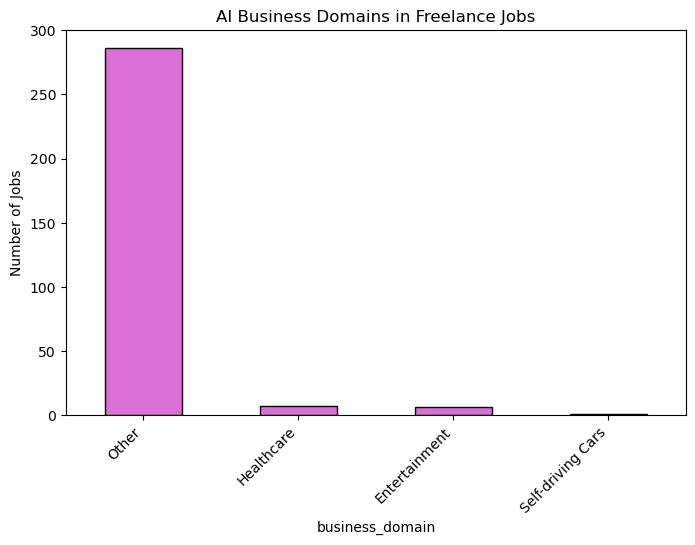